# Loading and Plotting the Climate dataset


This notebook demonstrates basic loading and plotting of the climate dataset used in interdisciplinary collaboration aiming at improving upon [https://doi.org/10.5194/cp-15-1427-2019](https://doi.org/10.5194/cp-15-1427-2019).


### Data
There are four datasets involved:


* **Instrumental**

   This dataset includes surface temperature anomalies deduced from observational data. *(see 
   [https://crudata.uea.ac.uk/cru/data/temperature/](https://crudata.uea.ac.uk/cru/data/temperature/))*
   
   Surface temperature anomalies are relative to a 1961-1990 reference period.
   
   
* **Ensemble Members**

   This dataset contains simulations from the CCC400 model. There are 30 different simulations (ensemble members).
   
   
* **Ensemble Means**

   This dataset is a mean across ensemble members of the preceding dataset.
   
* **Reference**

    This dataset serves as a reference for validation. We use the CRU TS 3.10 dataset 
   
   
 In the following we will explore the different datasets and demonstrate how they can be easily loaded and plotted using the functionalities provided by the **climate** package *([https://github.com/CedricTravelletti/Climate](https://github.com/CedricTravelletti/Climate))*

#### Loading:
The 3 datasets may be easily loaded by specifiying the root folder where the data is stored (*see preprocessing*). The number of different ensemble members to load should also be secified.

Note that one can download the data and create the folder structure using `scripts/download_and_preprocess.sh`. When working on a laptop, one can download only a subset of the data (first 9 ensemble members out of 30) using `scripts/download_and_preprocess_subset.sh`. This helps keep thing light(total dataset is 100GB).


We here load the instrumental data, the mean and the first 6 ensemble members (to keep computations light).

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

from climate.utils import load_dataset
base_folder = "/home/cedric/PHD/Dev/Climate/Data/"
TOT_ENSEMBLES_NUMBER = 9 # Only consider the first 6 ensemble members to keep it light.
dataset_mean, dataset_members, dataset_instrumental, dataset_reference = load_dataset(base_folder, TOT_ENSEMBLES_NUMBER)

/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_1/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_2/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_3/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_4/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_5/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_6/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_7/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_8/
/home/cedric/PHD/Dev/Climate/Data/Ensembles/Members/member_9/


/home/cedric/PHD/Dev/Climate/climate/utils.py:92: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dataset_mean['time'] = dataset_mean.indexes['time'].to_datetimeindex()
/home/cedric/PHD/Dev/Climate/climate/utils.py:93: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dataset_members['time'] = dataset_members.indexes['time'].to_datetimeindex()


The datasets are loaded into **xarray** arrays (*see [http://xarray.pydata.org/en/stable/index.html](http://xarray.pydata.org/en/stable/index.html)*).


This library provides high-level dataset routines. One can get a summary of a dataset by just calling its name:

In [2]:
dataset_members

,Array,Chunk
Bytes,318.50 MB,884.74 kB
Shape,"(9, 480, 96, 192)","(1, 12, 96, 192)"
Count,2160 Tasks,360 Chunks
Type,float32,numpy.ndarray


## Subsetting

One can index/subset a dataset along any of its dimension using `sel` together with the name of the dimension to index.

We here select the first simulation/ensemble member:

In [3]:
dataset_members.sel(member_nr=1)

<xarray.Dataset>
Dimensions:      (latitude: 96, longitude: 192, time: 480)
Coordinates:
  * longitude    (longitude) float64 -180.0 -178.1 -176.2 ... 174.4 176.2 178.1
  * latitude     (latitude) float64 88.57 86.72 84.86 ... -84.86 -86.72 -88.57
  * time         (time) datetime64[ns] 1960-01-16 1960-02-16 ... 1999-12-16
    member_nr    int64 1
Data variables:
    temperature  (time, latitude, longitude) float32 dask.array<chunksize=(12, 96, 192), meta=np.ndarray>
Attributes:
    title:        CCC400
    institution:  University of Bern
    source:       ECHAM5.4
    references:   Franke et al., 2017
    Conventions:  CF-1.6

We see that we have simulated data month by month.

Time indexing may be done in a similar way:

In [4]:
dataset_members.sel(member_nr=1, time='1999-01-16')

<xarray.Dataset>
Dimensions:      (latitude: 96, longitude: 192)
Coordinates:
  * longitude    (longitude) float64 -180.0 -178.1 -176.2 ... 174.4 176.2 178.1
  * latitude     (latitude) float64 88.57 86.72 84.86 ... -84.86 -86.72 -88.57
    time         datetime64[ns] 1999-01-16
    member_nr    int64 1
Data variables:
    temperature  (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
Attributes:
    title:        CCC400
    institution:  University of Bern
    source:       ECHAM5.4
    references:   Franke et al., 2017
    Conventions:  CF-1.6

## Positional Indexer

In the above example, we have accessed the data by specifiying the *value* that a given index must have, e.g. time should be equal to January 16 1999.

One can also acess the data by specifying the position of a given index in the list of its value. I.e. in the same fashion as we index an array: give me the element number 3.

In xarray this is done using `iloc()`. This can be useful when working with time indexes since it avoids having to type the whole date.

Example: give me the temperature at the third timestamp in the list:

In [5]:
dataset_members.isel(time=2) # Python is zero indexed, so this is the third member.

# Note that calls can be chained:
dataset_members.sel(member_nr=1).isel(time=2)

<xarray.Dataset>
Dimensions:      (latitude: 96, longitude: 192)
Coordinates:
  * longitude    (longitude) float64 -180.0 -178.1 -176.2 ... 174.4 176.2 178.1
  * latitude     (latitude) float64 88.57 86.72 84.86 ... -84.86 -86.72 -88.57
    time         datetime64[ns] 1960-03-16
    member_nr    int64 1
Data variables:
    temperature  (latitude, longitude) float32 dask.array<chunksize=(96, 192), meta=np.ndarray>
Attributes:
    title:        CCC400
    institution:  University of Bern
    source:       ECHAM5.4
    references:   Franke et al., 2017
    Conventions:  CF-1.6

Here the positional indexing refers to the coordinates list.
On can access it using:

In [6]:
dataset_members.time

<xarray.DataArray 'time' (time: 480)>
array(['1960-01-16T00:00:00.000000000', '1960-02-16T00:00:00.000000000',
       '1960-03-16T00:00:00.000000000', ..., '1999-10-16T00:00:00.000000000',
       '1999-11-16T00:00:00.000000000', '1999-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1960-01-16 1960-02-16 ... 1999-12-16

In [7]:
dataset_members.time[2]

<xarray.DataArray 'time' ()>
array('1960-03-16T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1960-03-16

## Acessing Dataset Variables

The different variables in a dataset may be accessed using the syntax: `dataset_name.variable_name`

Note that subsetting operations (see above) also return datasets, so their variables can also be accessed in the same way.


For example, if we want to get the air temperature field on March 1993 for the 3rd simulation ensemble:

In [8]:
dataset_members.sel(member_nr=1).isel(time=10).temperature

<xarray.DataArray 'temperature' (latitude: 96, longitude: 192)>
dask.array<getitem, shape=(96, 192), dtype=float32, chunksize=(96, 192), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 -180.0 -178.1 -176.2 ... 174.4 176.2 178.1
  * latitude   (latitude) float64 88.57 86.72 84.86 ... -84.86 -86.72 -88.57
    time       datetime64[ns] 1960-11-16
    member_nr  int64 1
Attributes:
    units:         K
    long_name:     air temperature at 2m
    cell_methods:  time: mean (interval: 1 month)

## Plotting

Any variable may be plotted by calling its `plot` method:

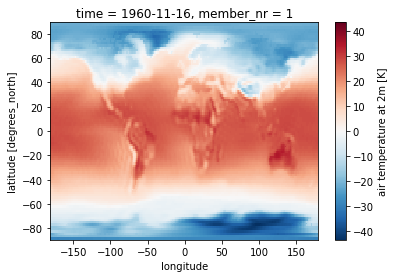

In [9]:
dataset_members.sel(member_nr=1).isel(time=10).temperature.plot()

One can also group several plot corresponding to different values of a coordinate. To do this, one should specify the name of the dimension along which to produce the different plots.


For example: we can compare the air temperature in March 1993 across the 6 ensemble members:

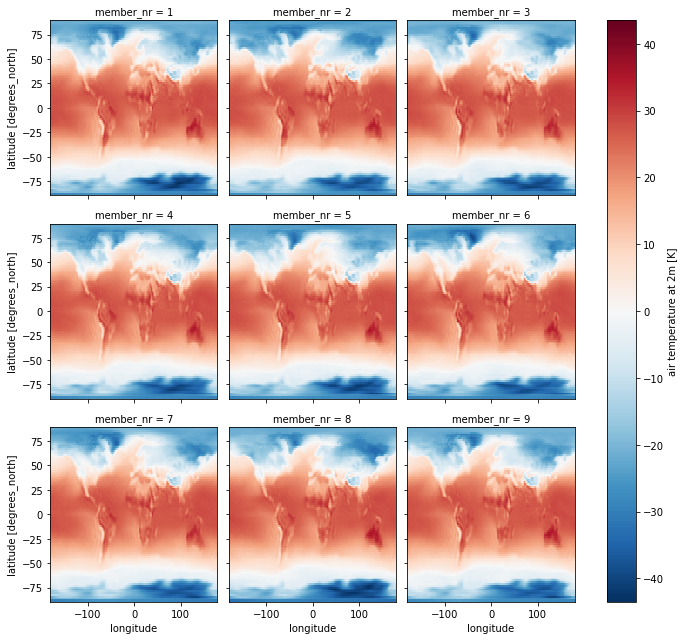

In [10]:
dataset_members.temperature.isel(time=10).plot(
    col='member_nr', col_wrap=3)

**PLEASE TAKE A MOMENT TO REFELECT ON THE BEAUTY OF WHAT JUST HAPPENED!!?!?!? How much has been achieved in so few lines of code.**

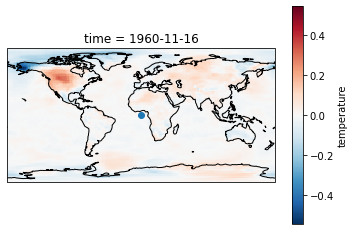

In [12]:
da_a = dataset_members.temperature.isel(time=10)
da_b = dataset_members.temperature.isel(time=10).sel(latitude=0.93,
        longitude=0.0)

import xarray as xr
covariances = xr.cov(da_a, da_b, 'member_nr')

import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
covariances.plot(ax=ax, transform=ccrs.PlateCarree())
ax.scatter(0.0, 0.0, transform=ccrs.PlateCarree())